In [1]:
from patchify import patchify, unpatchify
# Useful Imports
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn
from torch.autograd import Variable
import pandas as pd
import os,sys
import io
from PIL import Image
import tensorflow as tf
from IPython.display import clear_output
import tensorflow_datasets as tfds
import tensorflow.io as tfio
from glob import glob
import time
import datetime
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import *
from keras.layers import *

%load_ext autoreload
%autoreload 2


In [27]:
def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

#Load test images
root_dir = "test_set/"
image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = min(2, len(files)) # Load maximum 20 images
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])



#n = 10 # Only use 10 images for training


Loading 2 images
test_14.png


In [28]:
imgs =np.asarray(imgs)
print(imgs[0].shape)

#imgs = imgs[:, 48:560, 48:560,:]
#print(imgs.shape)
patch_size=128
n_classes=1
#print(imgs[0].shape)

(608, 608, 3)


In [29]:
# Load trained model 
from keras.models import load_model
model = load_model("Saved_models/unet_128_train.hdf5", compile=False)

In [33]:
# Apply predict_img_with_smooth_windowing
from smooth_tiled_predictions import predict_img_with_smooth_windowing
prediction_array = []
for i in range(n):
    prediction = predict_img_with_smooth_windowing(
        imgs[i],
        window_size=patch_size,
        subdivisions=2,  
        nb_classes=n_classes,
        pred_func=(lambda img_batch_subdiv: model.predict((img_batch_subdiv))
        )
    )
    prediction_array.append(prediction)

100%|██████████| 8/8 [00:30<00:00,  3.86s/it]


In [47]:
prediction_array = np.asarray(prediction_array)
#prediction_array_thresholded = np.where(prediction_array>0.3,1,0)

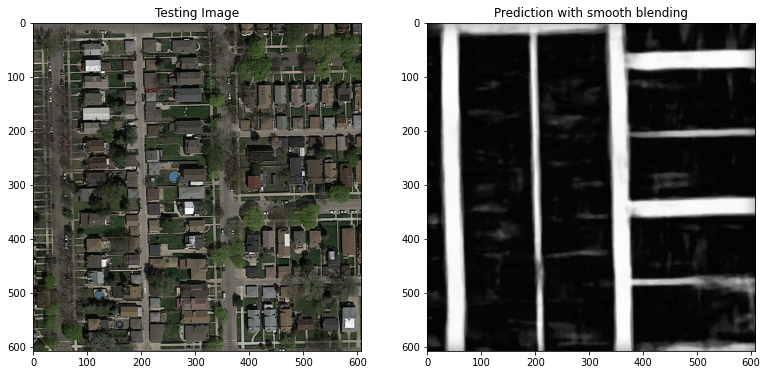

In [48]:
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(imgs[1], cmap='gray')

plt.subplot(132)
plt.title('Prediction with smooth blending')
plt.imshow(prediction_array[1], cmap='gray')
plt.show()  